In [10]:
#########################

import random
import math
from copy import deepcopyt

from tqdm import tqdm
import numpy as np
from networkx import gnm_random_graph, gnp_random_graph, erdos_renyi_graph
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt

#import any other  modules that you wish
#SHORTCUTS: Alt + Enter includes new cell below, CTRL + Enter executes the current cell
##########################


# Add your comments as markdown cells(This is a markdown cell).

## To add a markdown cell, simply click on a cell, then click on the 'Cell' tab above, change 'Cell Type' to 'Markdown'

Then add your comment! To view the format of this markdown cell, double click on here.

### Note: We provide you with example codes for starter, but feel free to delete anything we provide and write your own code, as long as you use allowed libraries and modules. 

## Part A: Simulate exponential and free-scale networks


1. Briefly explain how the weighted Erdos-Renyi generative model works.
Given number of nodes n and probability p, the model chooses each of the possible edges with probability p and assign random weights to the edges.
2. What are the key properties of weighted Erdos-Renyi (ER) graphs?
Nodes has around same number of edges, and every node's importance is nearly same.
3. Briefly explain how weighted scale-free (SF) algorithm works.
Probability of having x number edges follow a power distribution. Meaning small number of edges is more probable, and high number edges are less probable.
4. What are the key properties of weighted SF graphs?
Central nodes which has high number of edges are the most important nodes.
5. Visualize two random graphs you simulated (ER and SF).
6. Plot the overlaid distributions of the node strength centrality for all 30 ER graphs (transparent blue color) and the 30 SF graphs (transparent red color). What do you notice? Interpret your observation.
7. Plot the overlaid distributions of the eigenvector centrality for all 30 ER graphs (transparent blue color) and the 30 SF graphs (transparent red color). What do you notice? Interpret your observation.

In [11]:
class GraphGenerator:
    @classmethod
    def generate_all_graphs(
        cls, graph_count=30, node_count=200, p=0.05, seed=10123, max_weight=10
    ):
        GraphGenerator.give_seed(seed)
        print("Generating networks, please standby.")
        cls.exponential_network_list = []
        cls.free_scale_network_list = []
        for _ in tqdm(range(graph_count)):
            cls.exponential_network_list.append(
                GraphGenerator.generate_exponential_network(
                    node_count=node_count, p=p, max_weight=max_weight
                )
            )
            cls.free_scale_network_list.append(
                GraphGenerator.generate_free_scale_network(
                    node_count=node_count, max_weight=max_weight
                )
            )

    @staticmethod
    def generate_exponential_network(
        node_count=200, p=0.3, directed=False, max_weight=10
    ):
        seed = GraphGenerator.get_random_int(1000000)
        graph = erdos_renyi_graph(node_count, p, seed, directed=False)
        GraphGenerator.attach_random_weights_to_edges(graph, max_weight)
        return graph

    @staticmethod
    def generate_free_scale_network(node_count=200, directed=False, max_weight=10, alpha=0.41, beta=0.54, gamma=0.05):
        seed = GraphGenerator.get_random_int(1000000)
        graph = nx.scale_free_graph(node_count, seed=seed,alpha=alpha, beta=beta, gamma=gamma)
        if not directed:
            graph = graph.to_undirected()
        GraphGenerator.attach_random_weights_to_edges(graph, max_weight)
        graph.remove_edges_from(nx.selfloop_edges(graph))
        return graph

    @staticmethod
    def attach_random_weights_to_edges(graph, max_weight=10):
        # reference: https://stackoverflow.com/a/4098021/15282482
        for u, v, d in graph.edges(data=True):
            d["weight"] = GraphGenerator.get_random_int(max_weight)
        return graph

    @staticmethod
    def plot_graph(graph):
        nx.draw(graph)

    @staticmethod
    def get_adjacency_matrix(graph):
        return np.array(nx.adjacency_matrix(graph).todense())

    @staticmethod
    def give_seed(seed=10234):
        random.seed(seed)

    @staticmethod
    def get_random_int(max_number=100):
        return math.ceil((random.random() * max_number))
    
    @staticmethod
    def get_number_of_edges(graph):
        unweighted_adjacency_matrix = GraphGenerator.get_unweighted_adjacency_matrix(graph)
        return np.sum(unweighted_adjacency_matrix)

    @staticmethod
    def get_adjacency_matrix(graph):
        adjacency_matrix = nx.adjacency_matrix(graph).todense()
        return adjacency_matrix

    @staticmethod
    def get_unweighted_adjacency_matrix(graph):
        unweighted_adjacency_matrix = np.where(GraphGenerator.get_adjacency_matrix(graph) > 0, 1, 0)
        return unweighted_adjacency_matrix
    
    @staticmethod
    def get_node_centralities(graph):
        return np.sum(GraphGenerator.get_unweighted_adjacency_matrix(graph),axis=1) 

    @staticmethod
    def get_eigen_vector_centralities(graph):
        graph = nx.Graph(graph)
        returning =  list(nx.eigenvector_centrality(graph).values())
        return returning

[[0 0 9 0 0]
 [0 0 0 0 0]
 [9 0 0 3 0]
 [0 0 3 0 6]
 [0 0 0 6 0]]
[[0 9 0 0]
 [9 0 3 0]
 [0 3 0 6]
 [0 0 6 0]]
number of edges:6


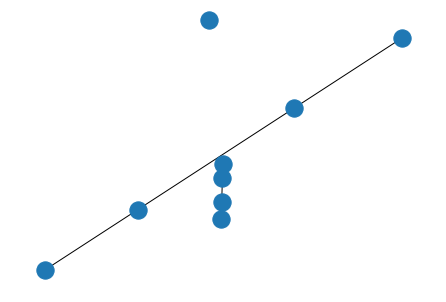

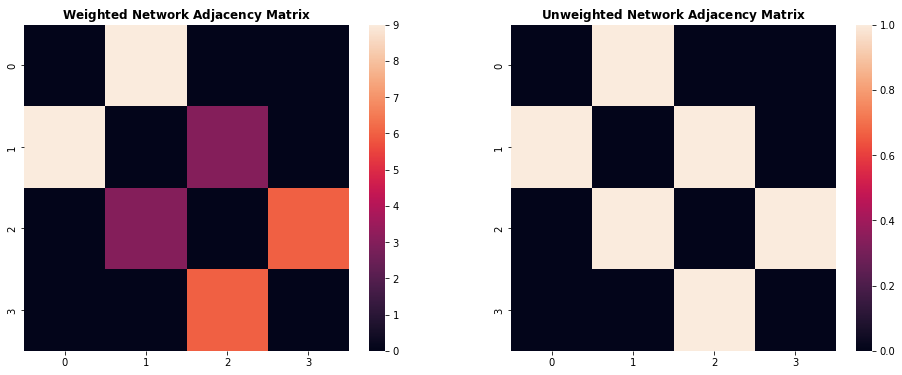

In [12]:
exponential_network = GraphGenerator.generate_exponential_network(5, 0.505, directed = False)

graph = exponential_network
print(GraphGenerator.get_adjacency_matrix(graph))
nx.draw(graph)
graph.remove_node(1)
print(GraphGenerator.get_adjacency_matrix(graph))
nx.draw(graph)

fig_adj, axs_adj = plt.subplots(1, 2, figsize=(16,6))
axs_adj[0].title.set_text(r"$\mathbf{Weighted\ Network\ Adjacency\ Matrix}$")
axs_adj[1].title.set_text(r"$\mathbf{Unweighted\ Network\ Adjacency\ Matrix}$")

adjacency_matrix = GraphGenerator.get_adjacency_matrix(graph)
unweighted_adjacency_matrix = GraphGenerator.get_unweighted_adjacency_matrix(graph)
print(f"number of edges:{GraphGenerator.get_number_of_edges(graph)}")
sns.heatmap(adjacency_matrix, ax=axs_adj[0])
sns.heatmap(unweighted_adjacency_matrix, ax=axs_adj[1])
plt.show()

[[ 0 10 28 23  5  0  0  2  0  0]
 [10  0  6  0  0  5  0  0  0  0]
 [28  6  0  0 10  2  0  0  7  4]
 [23  0  0  0  0  0 14  0  0  0]
 [ 5  0 10  0  0  0  0  0  0  0]
 [ 0  5  2  0  0  0  0  0  0  0]
 [ 0  0  0 14  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0]
 [ 0  0  7  0  0  0  0  0  0  0]
 [ 0  0  4  0  0  0  0  0  0  0]]
number of edges:24


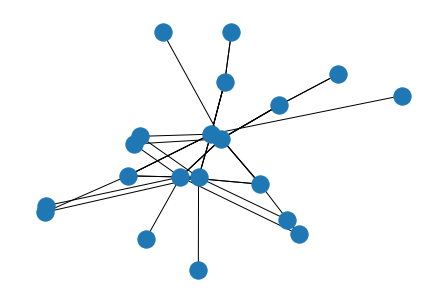

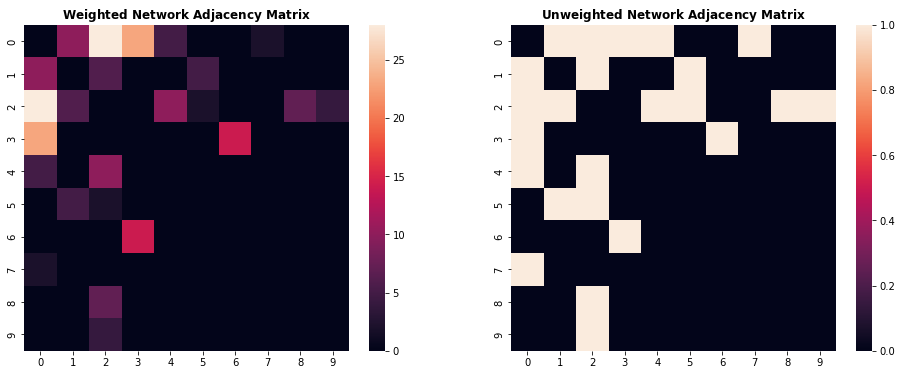

In [13]:
free_scale_network = GraphGenerator.generate_free_scale_network(10, directed = False)
nx.draw(free_scale_network)
print(GraphGenerator.get_adjacency_matrix(free_scale_network))

graph = free_scale_network
nx.draw(graph)

fig_adj, axs_adj = plt.subplots(1, 2, figsize=(16,6))
axs_adj[0].title.set_text(r"$\mathbf{Weighted\ Network\ Adjacency\ Matrix}$")
axs_adj[1].title.set_text(r"$\mathbf{Unweighted\ Network\ Adjacency\ Matrix}$")

adjacency_matrix = GraphGenerator.get_adjacency_matrix(graph)
unweighted_adjacency_matrix = GraphGenerator.get_unweighted_adjacency_matrix(graph)
print(f"number of edges:{GraphGenerator.get_number_of_edges(graph)}")


sns.heatmap(adjacency_matrix, ax=axs_adj[0])
sns.heatmap(unweighted_adjacency_matrix, ax=axs_adj[1])
plt.show()

scale_free_network = GraphGenerator.generate_free_scale_network(40, beta=0.6, directed = False)
nx.draw(scale_free_network)

print(scale_free_network.edges.data("weight"))
print(GraphGenerator.get_adjacency_matrix(scale_free_network))

graph = scale_free_network
fig_adj, axs_adj = plt.subplots(1, 2, figsize=(16,6))
axs_adj[0].title.set_text(r"$\mathbf{Weighted\ Network\ Adjacency\ Matrix}$")
axs_adj[1].title.set_text(r"$\mathbf{Unweighted\ Network\ Adjacency\ Matrix}$")

adjacency_matrix = nx.adjacency_matrix(graph).todense()
unweighted_adjacency_matrix = np.where(adjacency_matrix > 0, 1, 0)
print(f"number of edges:{np.sum(unweighted_adjacency_matrix)}")
sns.heatmap(adjacency_matrix, ax=axs_adj[0])
sns.heatmap(unweighted_adjacency_matrix, ax=axs_adj[1])
plt.show()

In [14]:
GraphGenerator.generate_all_graphs()

 23%|███████████████████████████████████████▏                                                                                                                                | 7/30 [00:00<00:00, 67.87it/s]

Generating networks, please standby.


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 64.90it/s]


Exponential network number of edges:2014


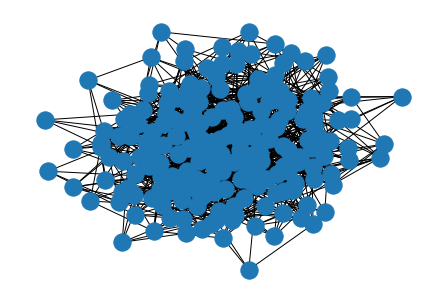

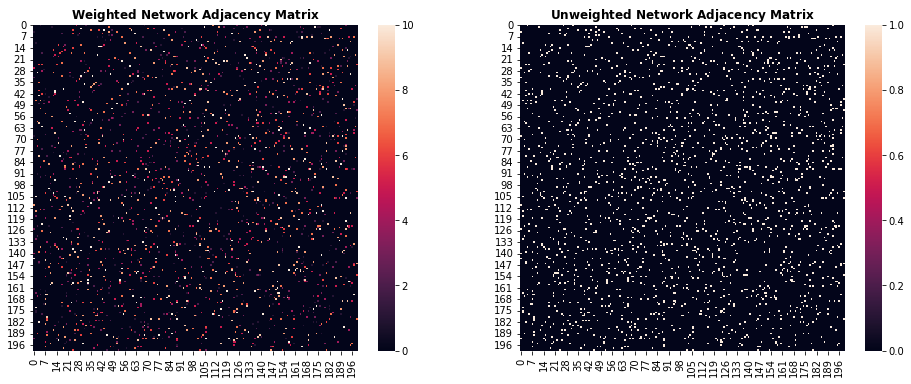

In [15]:
graph = GraphGenerator.exponential_network_list[4]
nx.draw(graph)


fig_adj, axs_adj = plt.subplots(1, 2, figsize=(16,6))
axs_adj[0].title.set_text(r"$\mathbf{Weighted\ Network\ Adjacency\ Matrix}$")
axs_adj[1].title.set_text(r"$\mathbf{Unweighted\ Network\ Adjacency\ Matrix}$")

adjacency_matrix = GraphGenerator.get_adjacency_matrix(graph)
unweighted_adjacency_matrix = GraphGenerator.get_unweighted_adjacency_matrix(graph)
print(f"Exponential network number of edges:{GraphGenerator.get_number_of_edges(graph)}")
sns.heatmap(adjacency_matrix, ax=axs_adj[0])
sns.heatmap(unweighted_adjacency_matrix, ax=axs_adj[1])
plt.show()


Free Scale Network number of edges:610


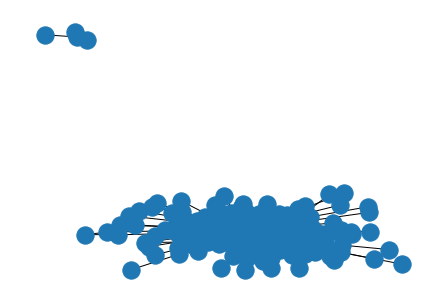

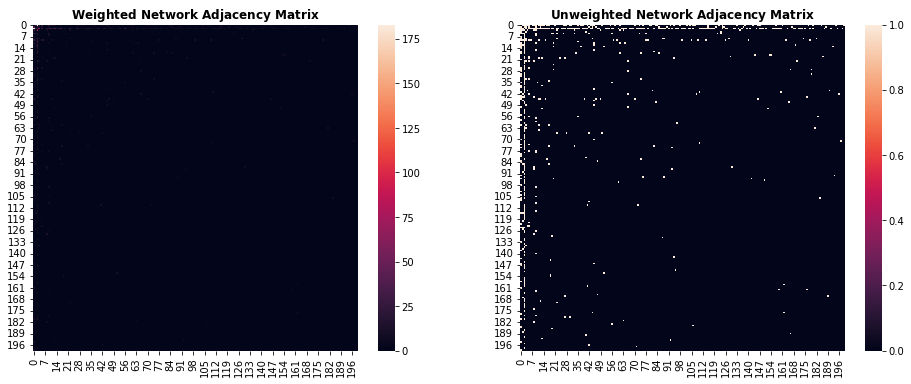

In [16]:
graph = GraphGenerator.free_scale_network_list[4]
nx.draw(graph)


fig_adj, axs_adj = plt.subplots(1, 2, figsize=(16,6))
axs_adj[0].title.set_text(r"$\mathbf{Weighted\ Network\ Adjacency\ Matrix}$")
axs_adj[1].title.set_text(r"$\mathbf{Unweighted\ Network\ Adjacency\ Matrix}$")

adjacency_matrix = GraphGenerator.get_adjacency_matrix(graph)
unweighted_adjacency_matrix = GraphGenerator.get_unweighted_adjacency_matrix(graph)
print(f"Free Scale Network number of edges:{GraphGenerator.get_number_of_edges(graph)}")
sns.heatmap(adjacency_matrix, ax=axs_adj[0])
sns.heatmap(unweighted_adjacency_matrix, ax=axs_adj[1])
plt.show()

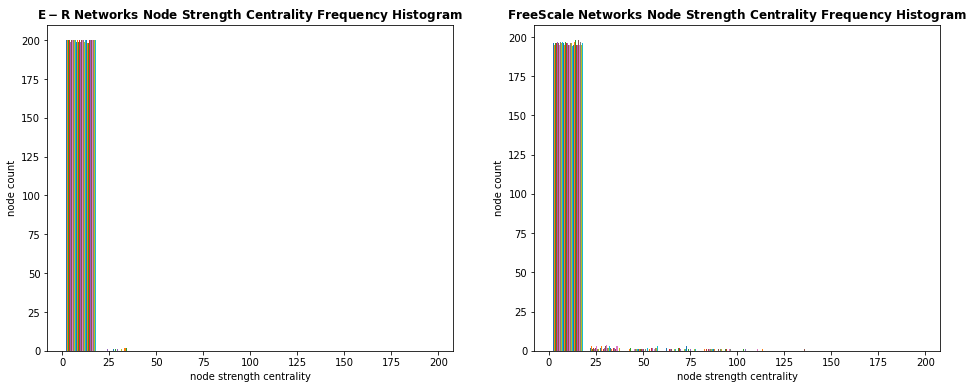

In [17]:
fig_adj, axs_adj = plt.subplots(1, 2, figsize=(16,6))
axs_adj[0].title.set_text(r"$\mathbf{E-R\ Networks\ Node\ Strength\ Centrality\ Frequency\ Histogram}$")
axs_adj[0].set_xlabel("node strength centrality")
axs_adj[0].set_ylabel("node count")
axs_adj[1].title.set_text(r"$\mathbf{Free Scale\ Networks\ Node\ Strength\ Centrality\ Frequency\ Histogram}$")
axs_adj[1].set_xlabel("node strength centrality")
axs_adj[1].set_ylabel("node count")

e_r_node_strengts = [
    GraphGenerator.get_node_centralities(graph)
    for graph in GraphGenerator.exponential_network_list]
axs_adj[0].hist(e_r_node_strengts, range=(0,200))

f_r_node_strengts = [
    GraphGenerator.get_node_centralities(graph)
    for graph in GraphGenerator.free_scale_network_list]
axs_adj[1].hist(f_r_node_strengts, range=(0,200))

plt.show()

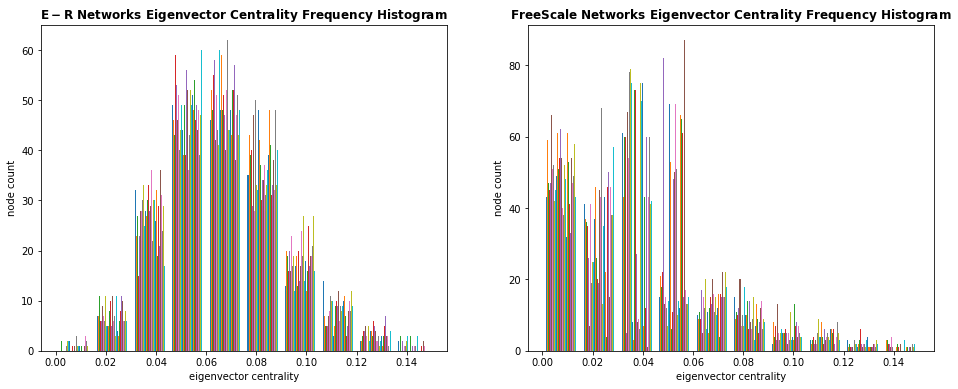

In [18]:
fig_adj, axs_adj = plt.subplots(1, 2, figsize=(16,6))
axs_adj[0].title.set_text(r"$\mathbf{E-R\ Networks\ Eigenvector\ Centrality\ Frequency\ Histogram}$")
axs_adj[0].set_xlabel("eigenvector centrality")
axs_adj[0].set_ylabel("node count")
axs_adj[1].title.set_text(r"$\mathbf{Free Scale\ Networks\ Eigenvector\ Centrality\ Frequency\ Histogram}$")
axs_adj[1].set_xlabel("eigenvector centrality")
axs_adj[1].set_ylabel("node count")


eigen_vector_centralities = [
    GraphGenerator.get_eigen_vector_centralities(graph)
    for graph in GraphGenerator.exponential_network_list
]
axs_adj[0].hist(eigen_vector_centralities,range=(0,0.15))


eigen_vector_centralities = [
    GraphGenerator.get_eigen_vector_centralities(graph)
    for graph in GraphGenerator.free_scale_network_list
]
axs_adj[1].hist(eigen_vector_centralities,range=(0,0.15))

plt.show()

### Add your written answers here

## Part B: Analyzing Erdos-Renyi and Scale-Free graphs in both random error and target attack scenarios

In [19]:
#Implement PART B:

class GraphFunctions:
    @staticmethod
    def largestConnectedComponent(adjacency_matrix):
        """
        Find largestConnectedComponent
        
        input: adjacency_matrix
        output: (
            maximal_subgraph, 
            S (Size of the maximal_subgraph), 
            diameter (average shortest path between nodes in the maximal_subgraph)
        )
        """
        graph = nx.convert_matrix.from_numpy_matrix(np.array(adjacency_matrix))
        
        maximal_component_node_list = max(nx.connected_components(graph), key=len)
        maximal_subgraph = graph.subgraph(maximal_component_node_list)
        
        S = len(maximal_subgraph.nodes())
        diameter = nx.algorithms.shortest_paths.generic.average_shortest_path_length(maximal_subgraph)
        
        return (maximal_subgraph, S, diameter)
    
    @staticmethod
    def find_percolation_threshold(adjacency_matrix, save_previous_version = False):
        """
        Find the percolation threshold of the graph.
        
        Remove random edges one by one from the graph. 
        When S/N < 1, that is when the percolation threshold realizes.
        
        Threshold: Number of edges remaining / Total Number Of Edges
        S: Size of the Largest Connected Component
        N: Number of nodes
        
        input: adjacency matrix, save_previous_version
        
        output: 
        (
            percolation_threshold,
            original_graph,
            just_before_seperation_graph,
            graph,
        )
        """
        # Generate the graph
        graph = nx.convert_matrix.from_numpy_matrix(np.array(adjacency_matrix))
        N = len(adjacency_matrix)
        largest_cc = max(nx.connected_components(graph), key=len)
        S= len(largest_cc)
        total_number_of_edges = len(graph.edges())
        
        original_graph = deepcopy(graph)
        just_before_seperation_graph = deepcopy(graph)
        
        # Remove edges one by one
        number_of_edges_removed = 0
        for i in tqdm(range(N**2)):
            if S/N != 1:
                number_of_edges_removed = i
                break
            # https://stackoverflow.com/a/54781113/15282482
            edge_to_remove=random.sample(graph.edges(),k=1)
            if save_previous_version:
                just_before_seperation_graph = deepcopy(graph)
            graph.remove_edges_from(edge_to_remove)
            
            largest_cc = max(nx.connected_components(graph), key=len)
            S= len(largest_cc)
        
        number_of_edges_remaining = total_number_of_edges - number_of_edges_removed
        return (
            number_of_edges_remaining / total_number_of_edges,
            original_graph,
            just_before_seperation_graph,
            graph,
        )
    
    @staticmethod
    def random_failure_scenario(adjacency_matrix, failure_fraction):
        """
        Randomly fail failure_fraction of nodes.
        
        input:
            adjacency_matrix
            failure_fraction

        output:
            resulting_graph_adjacency_matrix
        """
        graph = nx.convert_matrix.from_numpy_matrix(np.array(adjacency_matrix))

        N = len(adjacency_matrix)
        failing_node_count = round(failure_fraction * N)
        failing_nodes = random.sample(range(200),failing_node_count)
        
        graph.remove_nodes_from(failing_nodes)
        return GraphGenerator.get_adjacency_matrix(graph)

    @staticmethod
    def target_attack_scenario(adjacency_matrix, attack_fraction):
        """
        Targetedly attack to nodes with having highest number of edges.
        
        input:
            adjacency_matrix
            failure_fraction

        output:
            resulting_graph_adjacency_matrix
        """
        graph = nx.convert_matrix.from_numpy_matrix(np.array(adjacency_matrix))
        
        N = len(adjacency_matrix)
        attacked_node_count = round(attack_fraction * N)
        failing_nodes = np.flip(np.argsort(GraphGenerator.get_node_centralities(graph))[-attacked_node_count:])
        
        graph.remove_nodes_from(failing_nodes)
        return GraphGenerator.get_adjacency_matrix(graph)
    

In [20]:
# Percolation Threshold
graph = GraphGenerator.exponential_network_list[4]
adjacency_matrix = GraphGenerator.get_adjacency_matrix(graph)
(threshold, original_graph, just_before_seperation_graph, current_graph)  = GraphFunctions.find_percolation_threshold(adjacency_matrix, True)


  1%|██                                                                                                                                                                | 511/40000 [00:02<03:46, 174.21it/s]


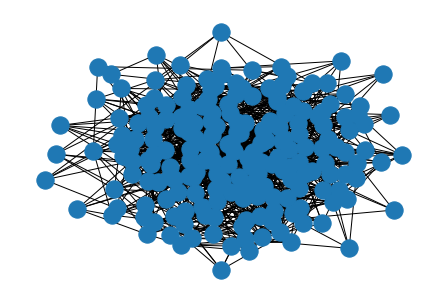

In [21]:
nx.draw(original_graph)

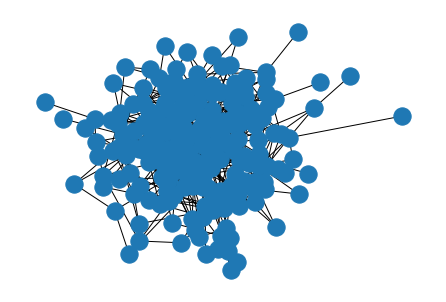

In [22]:
nx.draw(just_before_seperation_graph)


Percolation threshold: 0.4846077457795432


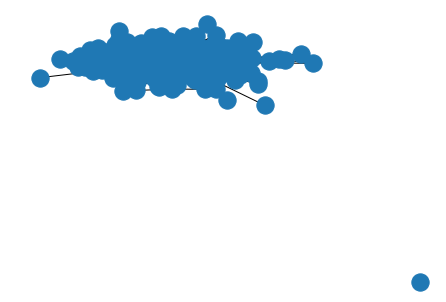

In [23]:
nx.draw(current_graph)
print(f"Percolation threshold: {threshold}")

In [24]:
# LargestConnectedComponent
graph = GraphGenerator.free_scale_network_list[4]
adjacency_matrix = GraphGenerator.get_adjacency_matrix(graph)

(largest_connected_component, S, diameter)  = GraphFunctions.largestConnectedComponent(adjacency_matrix)

size of the largest_connected_component: 196
diameter of the largest_connected_component: 2.624123495552067


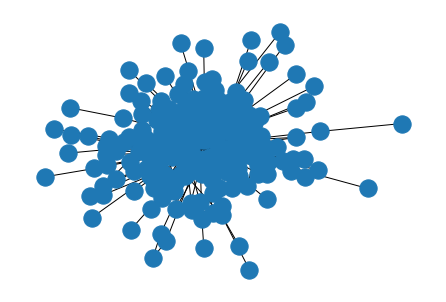

In [25]:
print(f"size of the largest_connected_component: {S}")
print(f"diameter of the largest_connected_component: {diameter}")
nx.draw(largest_connected_component)

Free scale network


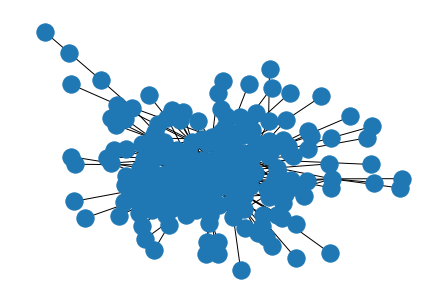

In [26]:
# Random Failure
graph = GraphGenerator.free_scale_network_list[10]
print("Free scale network")
nx.draw(graph)

Free scale network random failure with 0.5 ratio


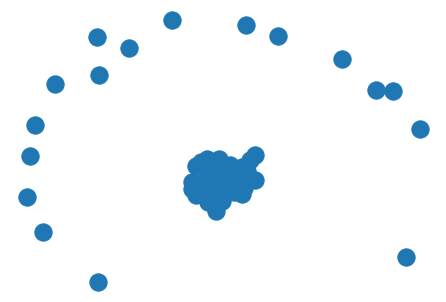

In [27]:
adjacency_matrix = GraphGenerator.get_adjacency_matrix(graph)
attacked_graph_adjacency_matrix = GraphFunctions.random_failure_scenario(adjacency_matrix, 0.5)
graph = nx.convert_matrix.from_numpy_matrix(np.array(attacked_graph_adjacency_matrix))
nx.draw(graph)
print("Free scale network random failure with 0.5 ratio")

Free scale network


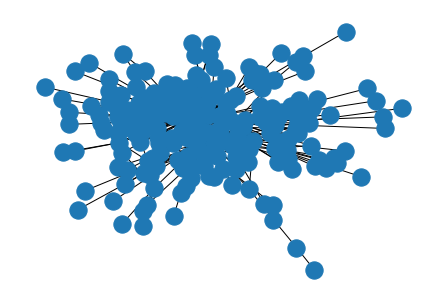

In [28]:
# Targeted Attack

print("Free scale network")
graph = GraphGenerator.free_scale_network_list[10]
nx.draw(graph)


Free scale network targeted attack with 0.005 ratio


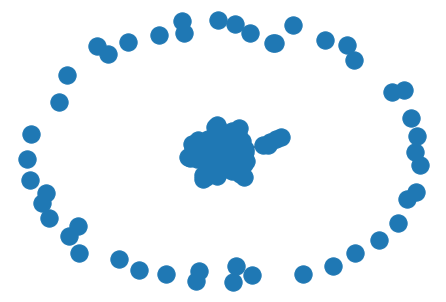

In [29]:

adjacency_matrix = GraphGenerator.get_adjacency_matrix(graph)
attacked_graph_adjacency_matrix = GraphFunctions.target_attack_scenario(adjacency_matrix, 0.005)
graph = nx.convert_matrix.from_numpy_matrix(np.array(attacked_graph_adjacency_matrix))
print("Free scale network targeted attack with 0.005 ratio")
nx.draw(graph)


Exponential network


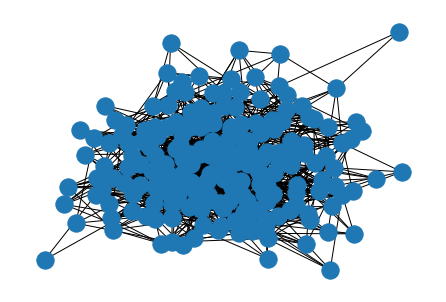

In [30]:
# Random Failure
graph = GraphGenerator.exponential_network_list[10]
print("Exponential network")
nx.draw(graph)

Exponential network random failure with 0.5 ratio


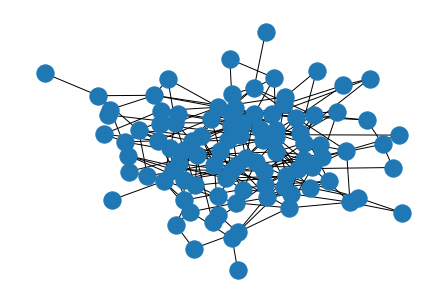

In [31]:
adjacency_matrix = GraphGenerator.get_adjacency_matrix(graph)
attacked_graph_adjacency_matrix = GraphFunctions.random_failure_scenario(adjacency_matrix, 0.5)
graph = nx.convert_matrix.from_numpy_matrix(np.array(attacked_graph_adjacency_matrix))
nx.draw(graph)
print("Exponential network random failure with 0.5 ratio")

Exponential network


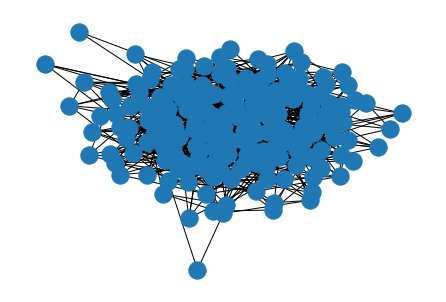

In [32]:
# Targeted Attack

print("Exponential network")
graph = GraphGenerator.exponential_network_list[10]
nx.draw(graph)


Exponential network targeted attack with 0.5 ratio


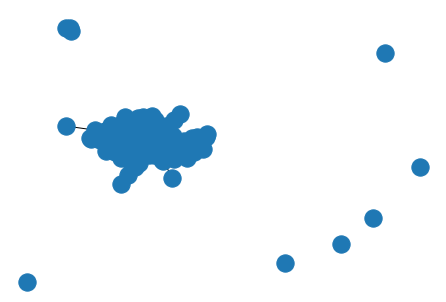

In [33]:
# Targeted Attack

adjacency_matrix = GraphGenerator.get_adjacency_matrix(graph)
attacked_graph_adjacency_matrix = GraphFunctions.target_attack_scenario(adjacency_matrix, 0.5)
graph = nx.convert_matrix.from_numpy_matrix(np.array(attacked_graph_adjacency_matrix))
print("Exponential network targeted attack with 0.5 ratio")
nx.draw(graph)
